# Deep Video Analytics client using REST API endpoint

In [1]:
import sys
sys.path.append('../')
import client
import logging
from IPython.display import Image, display

### Get token from /security and use the token along with url to create a context

In [7]:
ctx = client.DVAContext(server='http://localhost:8000/',token="96c3f754322c6fa7da724d14ef475cdd1f382189")

## List objects

In [8]:
for v in ctx.list_videos():
    print "{name} with ID: {vid}".format(name=v['name'],vid=v['id'])

exampledataset with ID: 2
crnn_test with ID: 3
citest with ID: 1


In [9]:
for v in ctx.list_models():
    print v['name']

coco
textbox
face
inception
facenet
crnn
tagger


## Process a video

In [ ]:
video_processing_query = client.ProcessVideoURL(name="test",url="https://www.youtube.com/watch?v=ashLaclKCik")
video_processing_query.execute(ctx)

##### Optionally you can "wait" on it to complete,

In [ ]:
video_processing_query.wait()

## Finding similar images

### Get inception indexer and retriever for similarity search

In [12]:
indexers = {r['name']:r for r in ctx.list_models() if r['model_type'] == 'I'}
retrievers = {r['name']:r for r in ctx.list_retrievers()}
print indexers['inception']['id']
print retrievers['inception']['id']

4
1


#### Query image

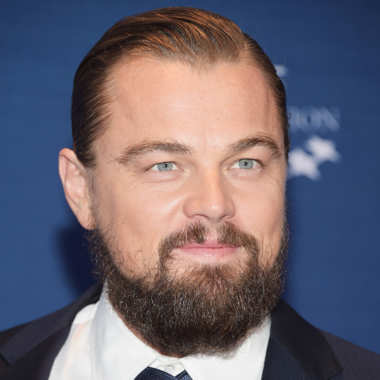

In [13]:
leo_query_image = '../notebooks/figures/leo.jpg'
display(Image(leo_query_image,width=300))

### Lets make a request using inception retriever and inception indexer

In [15]:
q = client.FindSimilarImages(leo_query_image,indexer_pk=indexers['facenet']['id'],
                             retriever_pk=retrievers['inception']['id'])
q.execute(context=ctx)

In [ ]:
res = {t['id']:sorted([(r['rank'],ctx.get_frame(r['frame'])['media_url'],r) for r in t['query_results']]) for t in q.results['tasks'] if t['query_results']}

In [ ]:
display(Image(url,width=100))

for _, rs in res.iteritems():
    for rank,url,entry in rs:
        print "Rank {}".format(rank)
        display(Image(url,width=300))        

In [ ]:
f = 
print f